In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:



tripadvisor_df = pd.read_csv('restaurants_TripAdvisor.csv')


michelin_df = pd.read_csv('restaurant_Michelin_data.csv', sep=';')


print("TripAdvisor DataFrame:")

michelin_df['distinction'].fillna('Guide michelin', inplace=True)
tripadvisor_df.head(4)


TripAdvisor DataFrame:


,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax
0,Agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0
1,Comme A La Maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0
2,Le Moi de Mets,https://www.tripadvisor.in//Restaurant_Review-...,"19 Place Maurice Marchais, 56000, Vannes France",+33 2 97 47 17 29,Closed now:,189,5.0,5.0,5.0,4.5,4.5,"Lunch, Dinner",NaN,"French, European, Healthy",NaN,15.0,37.0
3,Bvan,https://www.tripadvisor.in//Restaurant_Review-...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
michelin_df.head(2)

,name,chef,cuisine,distinction
0,Ryoko - Comptoir A Ramen,NaN,Spécialité Ramen,Guide michelin
1,Bvan,NaN,Cuisine moderne,Guide michelin


In [7]:

tripadvisor_df['name'] = tripadvisor_df['name'].str.strip().str.lower()
michelin_df['name'] = michelin_df['name'].str.strip().str.lower()

merged_df = pd.merge(tripadvisor_df, michelin_df[['name', 'distinction']], how='left', on='name')


tripadvisor_df['star'] = merged_df['distinction']

tripadvisor_df['star'].fillna('Aucune distinction', inplace=True)


tripadvisor_df.head(2)


,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star
0,agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0,Aucune distinction
1,comme a la maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0,Aucune distinction


# Visualisation de répartition

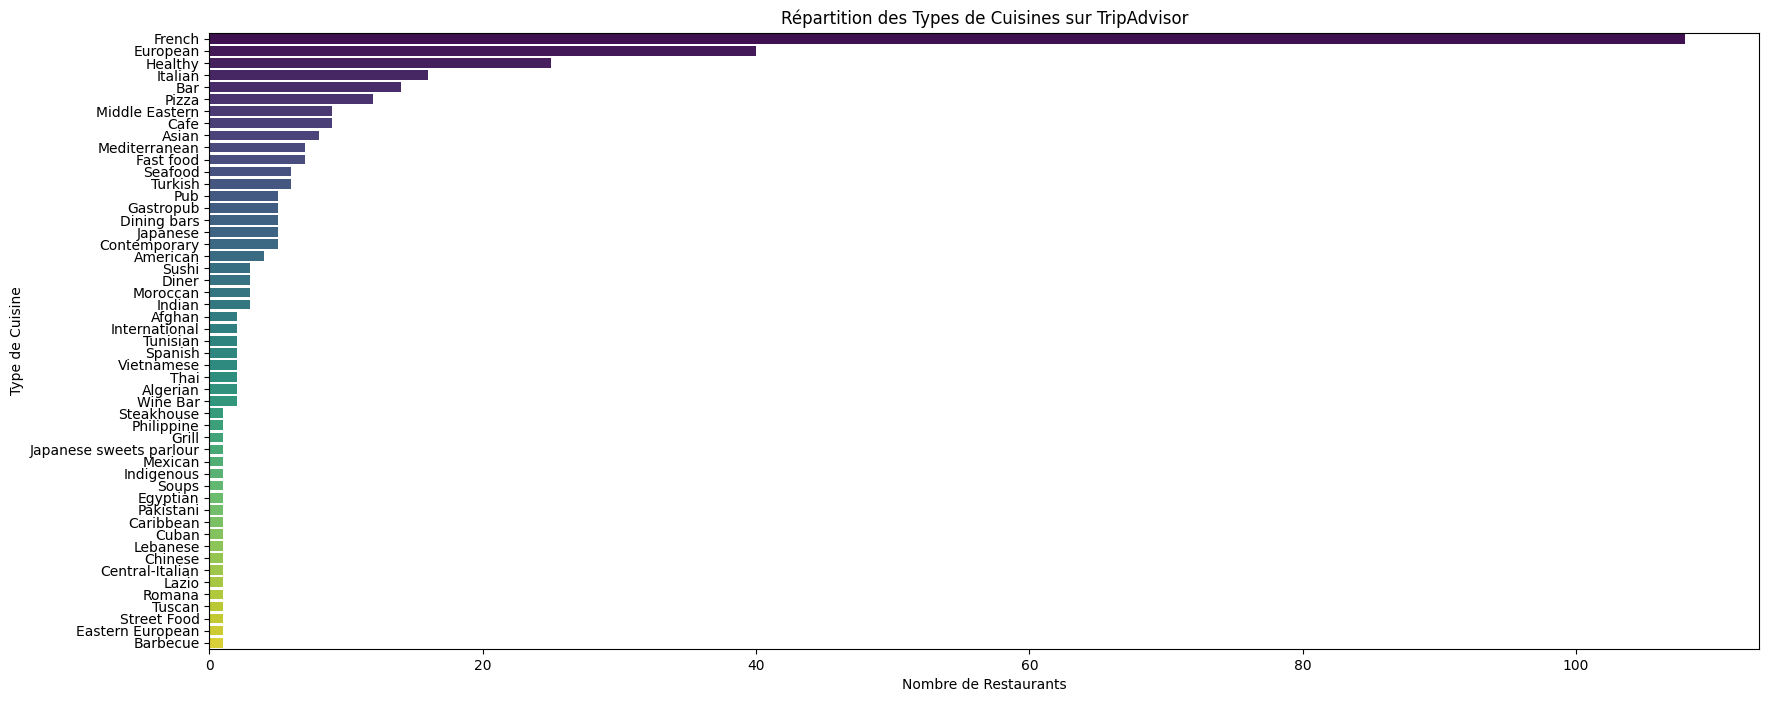

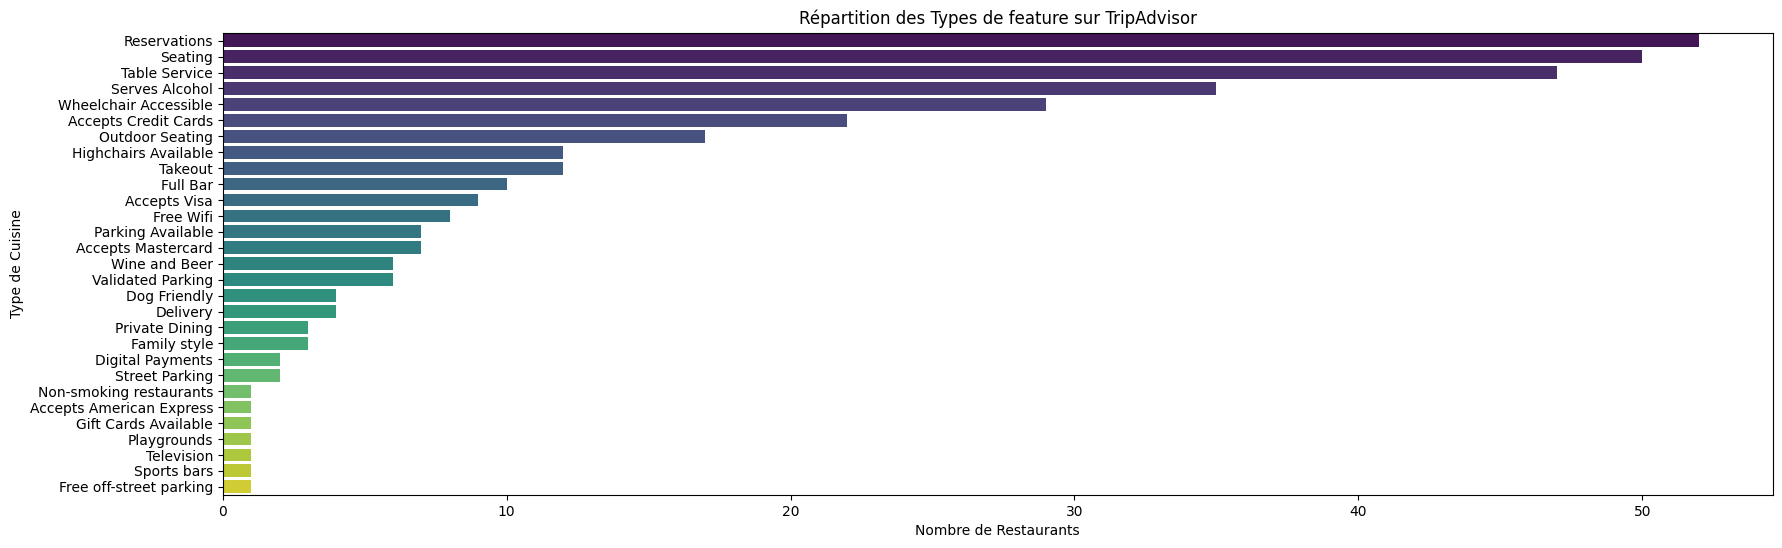

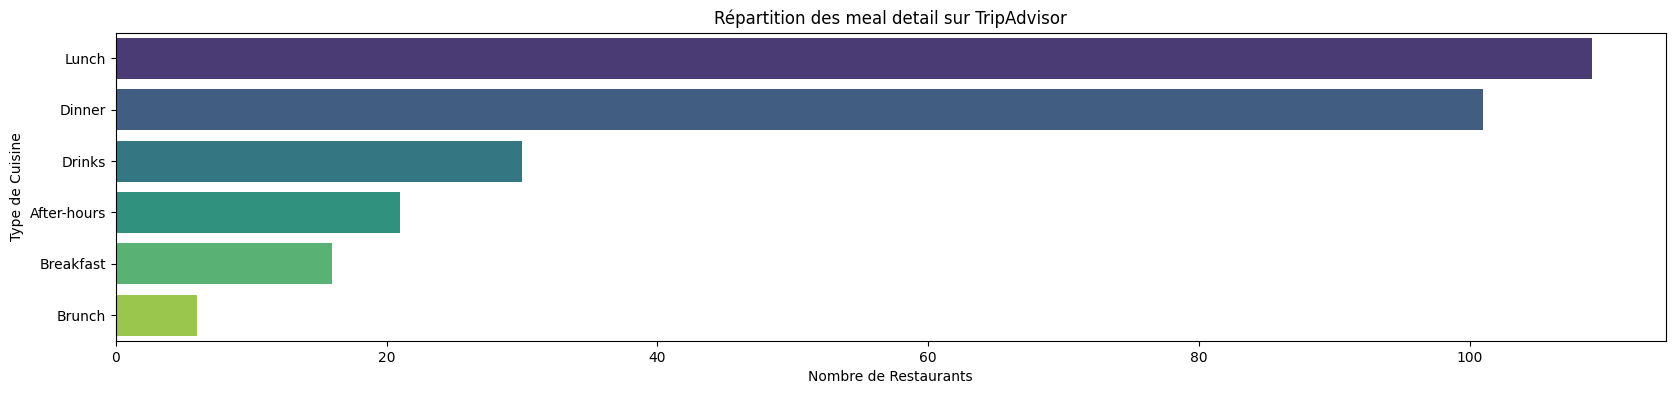

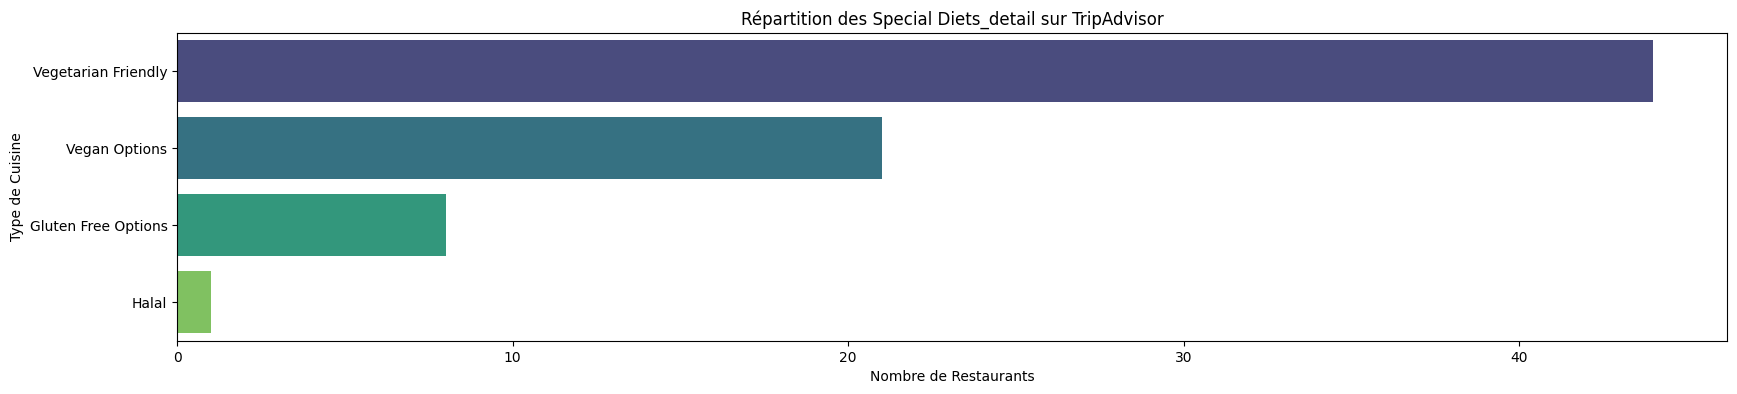

In [8]:

cuisines_df = tripadvisor_df['CUISINES_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 8))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des Types de Cuisines sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

cuisines_df = tripadvisor_df['FEATURES_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 6))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des Types de feature sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

cuisines_df = tripadvisor_df['Meals_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 4))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des meal detail sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

cuisines_df = tripadvisor_df['Special Diets_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 4))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des Special Diets_detail sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

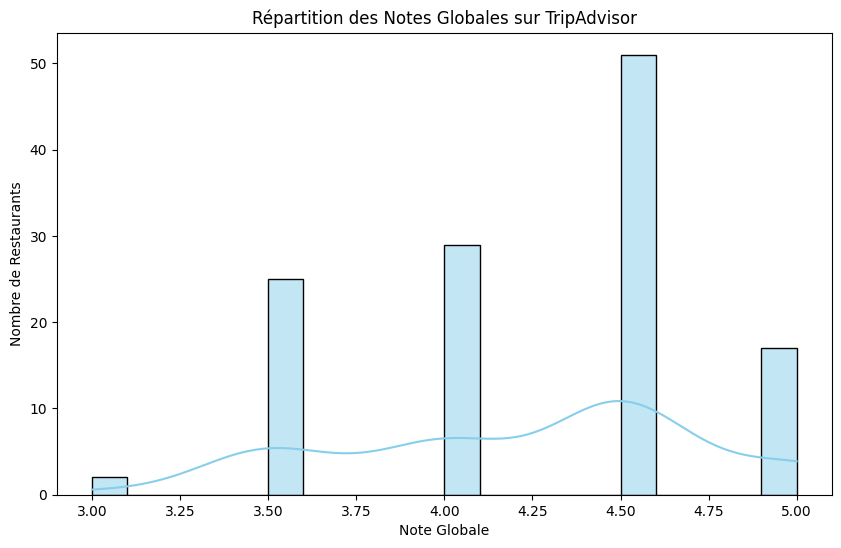

In [9]:

tripadvisor_df['global_rating'] = pd.to_numeric(tripadvisor_df['global_rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(tripadvisor_df['global_rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Répartition des Notes Globales sur TripAdvisor')
plt.xlabel('Note Globale')
plt.ylabel('Nombre de Restaurants')
plt.show()


In [10]:
!pip install geopandas

In [11]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="my_geocoder", timeout=20)

def get_location(row):
    try:
        location = geolocator.geocode(row['adress'])
        if location:
            return location.latitude, location.longitude
        else:
            return None
    except GeocoderTimedOut:
        return get_location(row)

tripadvisor_df[['latitude', 'longitude']] = tripadvisor_df.apply(get_location, axis=1, result_type='expand')

tripadvisor_df2 = tripadvisor_df
tripadvisor_df2.head(3)

,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star,latitude,longitude
0,agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0,Aucune distinction,47.659852,-2.758886
1,comme a la maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0,Aucune distinction,47.658614,-2.754278
2,le moi de mets,https://www.tripadvisor.in//Restaurant_Review-...,"19 Place Maurice Marchais, 56000, Vannes France",+33 2 97 47 17 29,Closed now:,189,5.0,5.0,5.0,4.5,4.5,"Lunch, Dinner",NaN,"French, European, Healthy",NaN,15.0,37.0,Aucune distinction,47.658049,-2.760928


In [12]:

nan_count_address = tripadvisor_df['adress'].isna().sum()
print(f"Nombre de NaN dans la colonne 'address': {nan_count_address}")


nan_count_latitude = tripadvisor_df['latitude'].isna().sum()
print(f"Nombre de NaN dans la colonne 'latitude': {nan_count_latitude}")


nan_count_longitude = tripadvisor_df['longitude'].isna().sum()
print(f"Nombre de NaN dans la colonne 'longitude': {nan_count_longitude}")


Nombre de NaN dans la colonne 'address': 49
Nombre de NaN dans la colonne 'latitude': 34
Nombre de NaN dans la colonne 'longitude': 34


In [13]:

null_address_not_null_lat_long = tripadvisor_df.loc[

    tripadvisor_df['latitude'].isna() &
    tripadvisor_df['longitude'].isna()
]

# Afficher le résultat
null_address_not_null_lat_long.head(3)


,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star,latitude,longitude
4,le thika,https://www.tripadvisor.in//Restaurant_Review-...,"11 bis Rue Thomas de Closmadeuc, 56000, Vannes...",+33 2 97 69 67 54,Open now:,465,5.0,4.5,5.0,4.5,NaN,NaN,NaN,"French, Fast food, European, Eastern European,...",Vegetarian Friendly,8.0,14.0,Aucune distinction,NaN,NaN
8,la gourmandiere,https://www.tripadvisor.in//Restaurant_Review-...,"Rue du Poignant, 56000, Vannes France",+33 2 97 47 16 13,Open now:,563,4.5,4.5,4.5,4.5,4.0,"Lunch, Dinner",NaN,"French, European",NaN,55.0,75.0,1 star,NaN,NaN
9,la creperie sarra'zen,https://www.tripadvisor.in//Restaurant_Review-...,"21 rue Noe Place du Poids Public, 56000, Vanne...",+33 2 97 68 11 16,Closed now:,260,5.0,4.5,4.5,4.5,4.5,NaN,NaN,"French, European","Vegetarian Friendly, Vegan Options",10.0,20.0,Aucune distinction,NaN,NaN


In [14]:
import folium
import pandas as pd

def map_restaurants_by_rating(df, column_name, filter_value):

    filtered_restaurants = df[df[column_name] == filter_value]

    map_center = [filtered_restaurants['latitude'].dropna().iloc[0], filtered_restaurants['longitude'].dropna().iloc[0]]
    restaurant_map = folium.Map(location=map_center, zoom_start=14)

    for index, restaurant in filtered_restaurants.iterrows():
        if not pd.isnull(restaurant['latitude']) and not pd.isnull(restaurant['longitude']):
            folium.Marker([restaurant['latitude'], restaurant['longitude']], popup=restaurant['name']).add_to(restaurant_map)


    return restaurant_map

map_restaurants_by_rating(tripadvisor_df, 'global_rating', 4.5)


In [15]:
import folium
import pandas as pd

def map_restaurants_by_value(df, column_name, filter_value):

    filtered_restaurants = df[df[column_name].str.contains(filter_value, case=False, na=False)]


    filtered_restaurants = filtered_restaurants.dropna(subset=['latitude', 'longitude'])


    if not filtered_restaurants.empty:
        map_center = [filtered_restaurants['latitude'].iloc[0], filtered_restaurants['longitude'].iloc[0]]
        restaurant_map = folium.Map(location=map_center, zoom_start=14)

        for index, restaurant in filtered_restaurants.iterrows():
            folium.Marker([restaurant['latitude'], restaurant['longitude']], popup=restaurant['name']).add_to(restaurant_map)


        return restaurant_map
    else:
        return None


map_restaurants_by_value(tripadvisor_df, 'Meals_detail', 'Dinner')


In [16]:

map_restaurants_by_value(tripadvisor_df, 'Special Diets_detail', 'Vegan Options')

In [17]:
tripadvisor_df

,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star,latitude,longitude
0,agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0,Aucune distinction,47.659852,-2.758886
1,comme a la maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0,Aucune distinction,47.658614,-2.754278
2,le moi de mets,https://www.tripadvisor.in//Restaurant_Review-...,"19 Place Maurice Marchais, 56000, Vannes France",+33 2 97 47 17 29,Closed now:,189,5.0,5.0,5.0,4.5,4.5,"Lunch, Dinner",NaN,"French, European, Healthy",NaN,15.0,37.0,Aucune distinction,47.658049,-2.760928
3,bvan,https://www.tripadvisor.in//Restaurant_Review-...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guide michelin,46.314475,11.048029
4,le thika,https://www.tripadvisor.in//Restaurant_Review-...,"11 bis Rue Thomas de Closmadeuc, 56000, Vannes...",+33 2 97 69 67 54,Open now:,465,5.0,4.5,5.0,4.5,NaN,NaN,NaN,"French, Fast food, European, Eastern European,...",Vegetarian Friendly,8.0,14.0,Aucune distinction,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,kusmi tea | vannes,https://www.tripadvisor.in//Restaurant_Review-...,"13 rue Saint Vincent, 56000, Vannes France",+33 2-97-44-53-79,Open now:,0,NaN,NaN,NaN,NaN,NaN,"Lunch, Dinner",NaN,NaN,NaN,NaN,NaN,Aucune distinction,47.763914,-2.135096
216,francois kouign amann - crepes - gateaux breton,https://www.tripadvisor.in//Restaurant_Review-...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucune distinction,46.314475,11.048029
217,ty vira,https://www.tripadvisor.in//Restaurant_Review-...,"11 rue Thiers, 56000, Vannes France",+33 7 86 17 95 71,Closed now:,0,NaN,NaN,NaN,NaN,NaN,"Lunch, Dinner, Drinks",NaN,"European, Asian",NaN,NaN,NaN,Aucune distinction,47.656437,-2.759698
218,les charmettes quelneuc,https://www.tripadvisor.in//Restaurant_Review-...,"Le Bourg, 56910 Quelneuc, Vannes France",+33 2 99 93 79 75,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,Aucune distinction,NaN,NaN


In [18]:
map_restaurants_by_value(tripadvisor_df, 'star', 'Guide michelin')